# Carregar dados

In [1]:
import pandas as pd

# # Mostrar mais colunas
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 100)

df = pd.read_parquet("./output/gold/rais_TODOS_ANOS_comJoin_RAIS_VINC_PUB.parquet.gzip")

qnt_full = len(df)
print(f"""
Quantidade docs: {qnt_full}
""")

df.head(2)



Quantidade docs: 1543009



,ano,sigla_uf_id,regiao,regiao_id,sigla_uf,remuneracao_media,desligamento,idade,ocupacao_id,ocupacao,sexo_id,sexo
0,2019,11,Centro-Oeste,0,MS,997.99,0,17,317210,Tecnico de Apoio ao Usuario de Informatica (Helpdesk),1,Masculino
1,2019,11,Centro-Oeste,0,MS,0.00,0,36,212420,Analista de Suporte Computacional,1,Masculino


In [2]:
df_2019 = df[df["ano"] == 2019]
df_2020 = df[df["ano"] == 2020]

print(f"""
Quantidade
df_2019: {len(df_2019)}
df_2020: {len(df_2020)}
""")



Quantidade
df_2019: 162073
df_2020: 222102



# Verificando Dados Gerais

In [3]:
df.describe()

,ano,sigla_uf_id,regiao_id,remuneracao_media,desligamento,idade,ocupacao_id,sexo_id
count,1.543009e+06,1.543009e+06,1.543009e+06,1.543009e+06,1.543009e+06,1.543009e+06,1.543009e+06,1.543009e+06
mean,2.019738e+03,1.882856e+01,2.698468e+00,5.362849e+03,6.039168e-01,3.396295e+01,2.479460e+05,1.206990e+00
std,1.302020e+00,7.084583e+00,1.103642e+00,5.154174e+03,4.890823e-01,9.633748e+00,4.960089e+04,4.051482e-01
min,2.018000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,2.122050e+05,1.000000e+00
25%,2.018000e+03,1.400000e+01,3.000000e+00,2.010510e+03,0.000000e+00,2.700000e+01,2.124050e+05,1.000000e+00
50%,2.020000e+03,2.200000e+01,3.000000e+00,3.728800e+03,1.000000e+00,3.200000e+01,2.124150e+05,1.000000e+00
75%,2.021000e+03,2.500000e+01,3.000000e+00,7.105950e+03,1.000000e+00,3.900000e+01,3.171100e+05,1.000000e+00
max,2.021000e+03,2.600000e+01,4.000000e+00,1.614076e+05,1.000000e+00,9.200000e+01,3.172100e+05,2.000000e+00


# Dados por Estado, Raça, Sexo

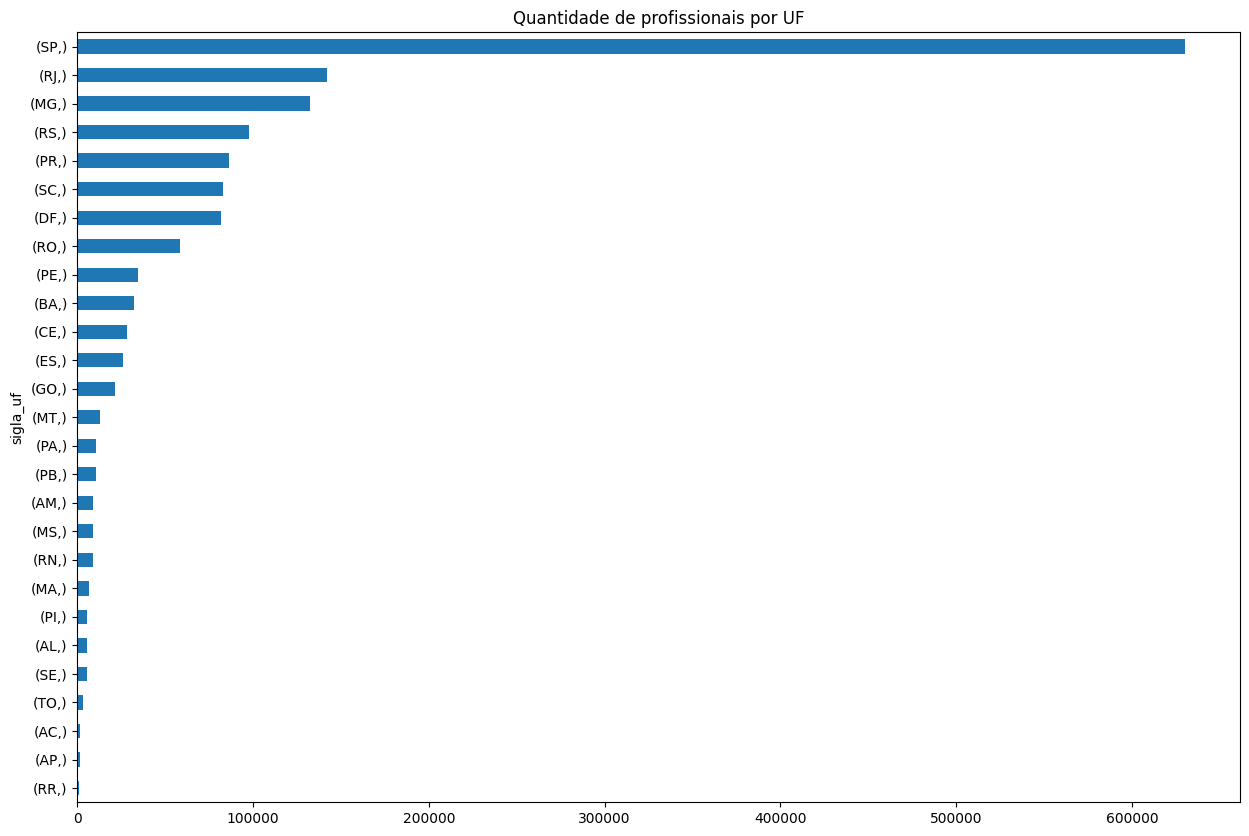

In [4]:
graf_sigla_uf = df[["sigla_uf"]].value_counts(ascending=True).plot(kind="barh", 
                                                                   figsize=(15, 10), 
                                                                   title="Quantidade de profissionais por UF")
graf_sigla_uf.get_figure().savefig("./output/gold/graf_sigla_uf.png")

In [5]:
graf_raca_cor = df[["raca_cor"]].value_counts(ascending=True).plot(kind="barh", 
                                                                   figsize=(15, 5), 
                                                                   title="Raça cor")
graf_raca_cor.get_figure().savefig("./output/gold/graf_raca_cor.png")


KeyError: "None of [Index(['raca_cor'], dtype='object')] are in the [columns]"

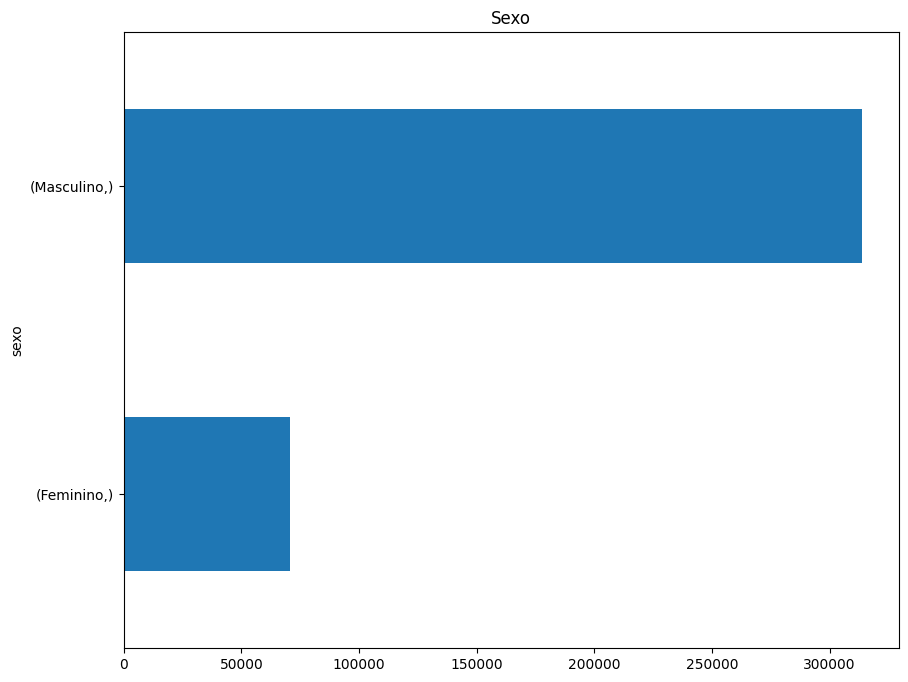

In [ ]:
graf_sexo = df[["sexo"]].value_counts(ascending=True).plot(kind="barh", 
                                                                   figsize=(10, 8), 
                                                                   title="Sexo")
graf_sexo.get_figure().savefig("./output/gold/graf_sexo.png")


# Analisando

- Ano: 2019
- Alvo: salário

In [ ]:
hip_01 = df_2019["valor_remuneracao_media"].describe()
hip_01
# plot hip_01
# hip_01.plot(kind="bar", figsize=(10, 5), title="Hipótese 01")


count    162073.000000
mean          5.091095
std           5.364896
min           0.000000
25%           1.780000
50%           3.380000
75%           6.610000
max         121.070000
Name: valor_remuneracao_media, dtype: float64

# Correlação entre colunas

- Correlação entre Ano, Estado, Idade, Ocupação, Sexo, Cor

In [ ]:
# https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas

df_apenas_ids = df[[
    "ano", "sigla_uf_id", "idade", "ocupacao_id", "sexo_id", "raca_cor_id"]]

corr_an = df_apenas_ids.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
# corr_an = df_apenas_ids.corr()
corr_an

,ano,sigla_uf_id,idade,ocupacao_id,sexo_id,raca_cor_id
ano,1.000000,0.022736,-0.000615,-0.000845,0.052724,-0.013575
sigla_uf_id,0.022736,1.000000,-0.059076,-0.014747,0.023051,-0.212343
idade,-0.000615,-0.059076,1.000000,0.067848,0.023555,0.097914
ocupacao_id,-0.000845,-0.014747,0.067848,1.000000,-0.015581,-0.045122
sexo_id,0.052724,0.023051,0.023555,-0.015581,1.000000,0.084287
raca_cor_id,-0.013575,-0.212343,0.097914,-0.045122,0.084287,1.000000


Matriz de correlação: The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between

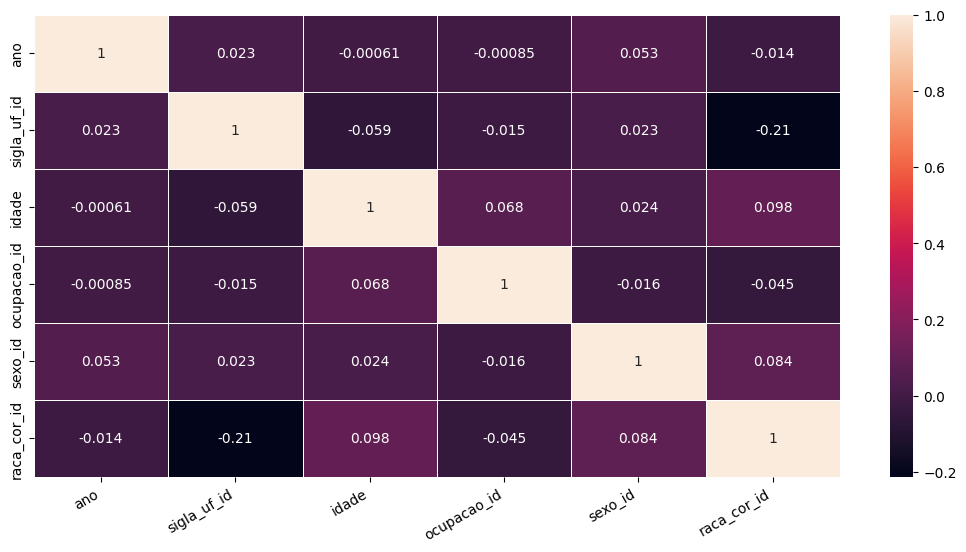

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 6))
sns.heatmap(corr_an, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment="right")
plt.show()


In [ ]:
# from pandas.plotting import scatter_matrix

# scatter_matrix(df_apenas_ids, figsize=(12, 8))

